#[10MARKS]

# Prerequisite
* Load required packages and load images (already uploaded on  blackboard content) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY tensorflow operations and basic numpy operations are allowed**
* **VISUALIZE IMAGE AT ALL SUBQUESTIONS**
* **At all subquestion, kindly normalize image if required**

In [3]:
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Q1) Display following stages
## a) Load 'kankal01.png'        


In [4]:
# Read image using TensorFlow
img_path = '/content/kankal_01.png'
# img = tf.io.read_file(img_path)
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
img = tf.convert_to_tensor(img, dtype=tf.float32)
# img = tf.image.decode_image(img, channels=1)  # Grayscale image

In [5]:
# Define kernel
kernel_sz1 = tf.ones((1, 1), dtype=tf.float32)

In [6]:
# Change data type of image using TensorFlow
img_a = tf.cast(img, tf.float32)  # Convert image to float32
img_a = tf.nn.conv2d( tf.reshape(img_a, (1,img_a.shape[0],img_a.shape[1],1)),\
                     tf.reshape(kernel_sz1,\
                      (kernel_sz1.shape[0],kernel_sz1.shape[1],1,1)),\
                      strides=[1, 1, 1, 1], padding='SAME')

In [7]:
# Print information about the image
print('Original Data_type is', img.dtype)
print('Kernel_sz1 =', kernel_sz1)
print('Data_type is', img_a.dtype)
print('Image Size is', img_a.shape)
print('Image min and max are ({}, {})'.format(tf.reduce_min(img_a),\
                                              tf.reduce_max(img_a)))

Original Data_type is <dtype: 'float32'>
Kernel_sz1 = tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
Data_type is <dtype: 'float32'>
Image Size is (1, 800, 246, 1)
Image min and max are (0.0, 255.0)


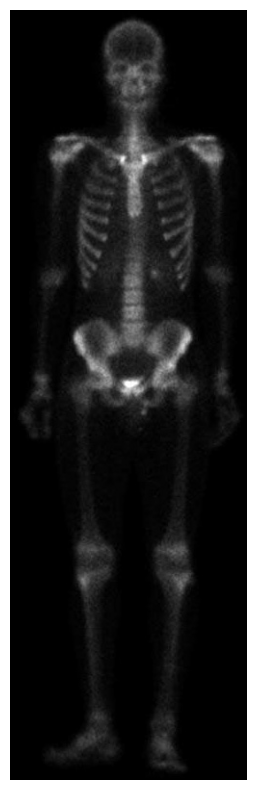

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(tf.squeeze(img_a), cmap='gray')
plt.axis('off')
plt.show()

## b) Apply and display Laplacian of a) [1 Marks]


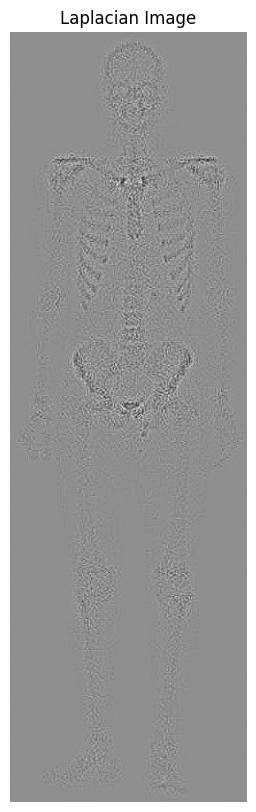

In [39]:

laplacian_filter = tf.constant([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=tf.float32)
laplacian_filter = tf.reshape(laplacian_filter, (3, 3, 1, 1))
laplacian_img = tf.nn.conv2d(
    tf.reshape(img_a, (1, img_a.shape[1], img_a.shape[2], 1)),
    laplacian_filter,
    strides=[1, 1, 1, 1], padding='SAME'
)

plt.figure(figsize=(10,10))
plt.imshow(tf.squeeze(laplacian_img), cmap='gray')
plt.axis('off')
plt.title("Laplacian Image")
plt.show()


## c) Sharpen the image obtained by adding a) and b) [1 Marks]

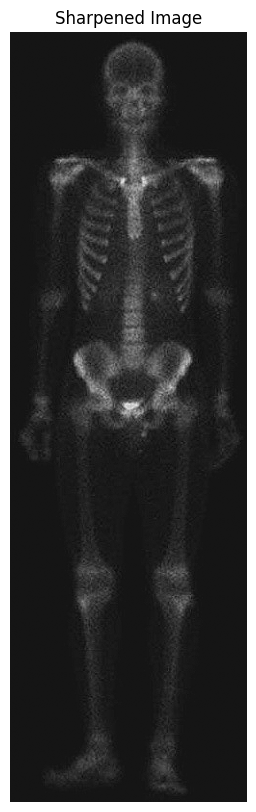

In [79]:

sharpened_img = img_a -laplacian_img

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(sharpened_img), cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')
plt.show()


## d) Sobel gradient of a) [2 Marks]




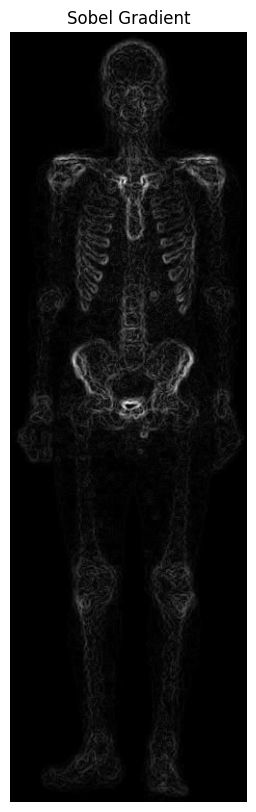

In [80]:

sobel_x_kernel = tf.constant([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=tf.float32)

sobel_y_kernel = tf.constant([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
], dtype=tf.float32)


sobel_x_kernel = tf.reshape(sobel_x_kernel, (*sobel_x_kernel.shape, 1, 1))
sobel_y_kernel = tf.reshape(sobel_y_kernel, (*sobel_y_kernel.shape, 1, 1))

# Apply Sobel filters
sobel_x = tf.nn.conv2d(
    tf.reshape(img_a, (1, img_a.shape[1], img_a.shape[2], 1)),
    sobel_x_kernel,
    strides=[1, 1, 1, 1],
    padding='SAME'
)
sobel_y = tf.nn.conv2d(
    tf.reshape(img_a, (1, img_a.shape[1], img_a.shape[2], 1)),
    sobel_y_kernel,
    strides=[1, 1, 1, 1],
    padding='SAME'
)


sobel_gradient = tf.sqrt(tf.square(sobel_x) + tf.square(sobel_y))


sobel_gradient_norm = (sobel_gradient - tf.reduce_min(sobel_gradient)) / (tf.reduce_max(sobel_gradient) - tf.reduce_min(sobel_gradient))


plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(sobel_gradient_norm), cmap='gray')
plt.title('Sobel Gradient')
plt.axis('off')
plt.show()


## e) Smooth the d) with a $5\times 5$ averaging filter [2 Marks]

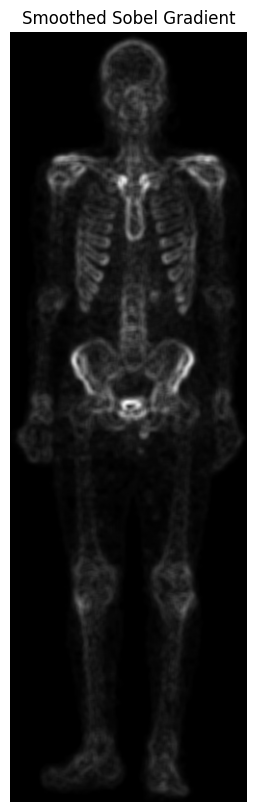

In [48]:

averaging_kernel = tf.ones((5, 5), dtype=tf.float32) / 25

averaging_kernel = tf.reshape(averaging_kernel, (*averaging_kernel.shape, 1, 1))


smoothed_sobel = tf.nn.conv2d(
    tf.reshape(sobel_gradient, (1, sobel_gradient.shape[1], sobel_gradient.shape[2], 1)),
    averaging_kernel,
    strides=[1, 1, 1, 1],
    padding='SAME'
)


smoothed_sobel_norm = (smoothed_sobel - tf.reduce_min(smoothed_sobel)) / (tf.reduce_max(smoothed_sobel) - tf.reduce_min(smoothed_sobel))


plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(smoothed_sobel_norm), cmap='gray')
plt.title('Smoothed Sobel Gradient')
plt.axis('off')
plt.show()


## f) Get Mask image formed by pixelwise product of c) and e) [1 Marks]

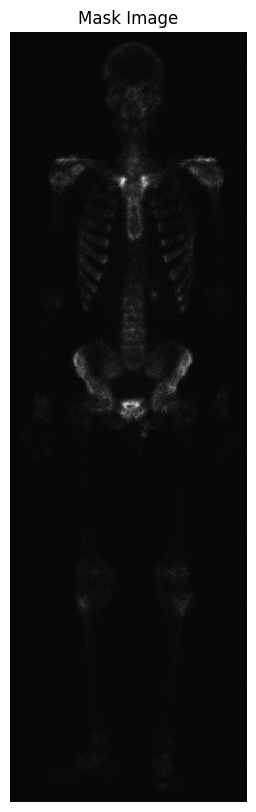

In [82]:

mask_image = sharpened_img * smoothed_sobel_norm

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(mask_image), cmap='gray')
plt.title('Mask Image')
plt.axis('off')
plt.show()


## g) Get sharpened image obtained by the sum of a) and f) [1 Marks]

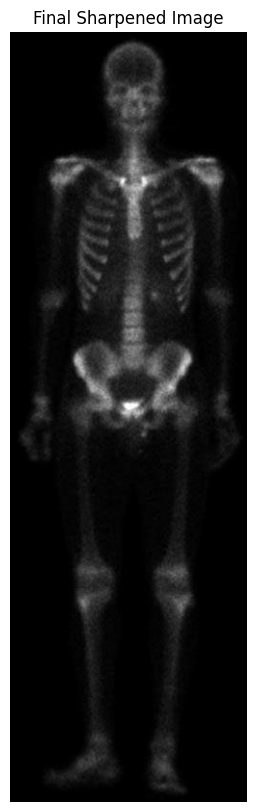

In [81]:

final_sharpened_img = img_a + mask_image

final_sharpened_img_norm = (final_sharpened_img - tf.reduce_min(final_sharpened_img)) / (tf.reduce_max(final_sharpened_img) - tf.reduce_min(final_sharpened_img))

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(final_sharpened_img_norm), cmap='gray')
plt.title('Final Sharpened Image')
plt.axis('off')
plt.show()


## h) Get bone enhancing by applying power law transformation to g) [1 Marks]


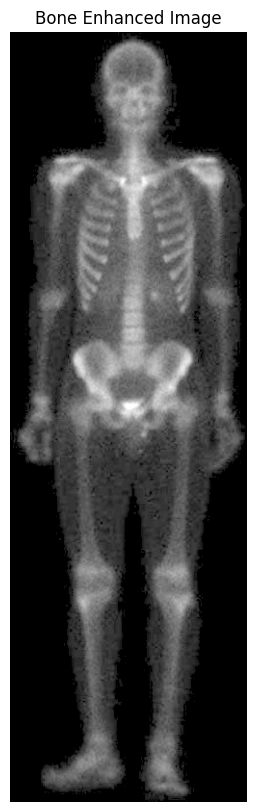

In [83]:


final_sharpened_img_norm = tf.cast(final_sharpened_img_norm, tf.float32)

gamma = 0.4
c = 2.0


enhanced_img = c * tf.pow(final_sharpened_img_norm, gamma)


enhanced_img_norm = (enhanced_img - tf.reduce_min(enhanced_img)) / (tf.reduce_max(enhanced_img) - tf.reduce_min(enhanced_img))


plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(enhanced_img_norm), cmap='gray')
plt.title('Bone Enhanced Image')
plt.axis('off')
plt.show()


##i) Write down your observation related to image enhancement from a) to h) [1 Marks]


1. In the part b, we are finding the laplacian of the image given to us in part a, to  figure out edge detection and we used the small kernel for the same.
2. Then in part c we are subtracting the laplacian image from the original image which results in a sharpened image.
3. Then in part d, we are applying the sobel gradient, what this does is it has two filters horizontal and vertical kernels for detecting edges along the x and y axis.
4. Then in part e, we apply a 5X5 filter to smooth the sobel gradient image using 2d convolution. The result is then normalized and displayed as a grayscale image.
5. In part f, code enhances edges in the image by multiplying a sharpened image  with the normalized smoothed Sobel gradient. The resulting mask image highlights prominent edges.
6. In part g, we get a sharpened image by adding the mask image to the original one.
7. Finally in part h, we get a enhanced bone image by applying power This code applies gamma correction to enhance the brightness and contrast of the final_sharpened_img_norm using a gamma value of 0.4 and a scaling factor c of 2.0. It then normalizes the enhanced image to a range between 0 and 1.